In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


In [35]:
# Load the .npy file
# data = np.load('Dataset.npy')
data = np.load('data/Dataset.npy')
# data = data[0:100000]
print(data)

['ur4592644,tt0120884,10,16 January 2005'
 'ur3174947,tt0118688,3,16 January 2005'
 'ur3780035,tt0387887,8,16 January 2005' ...
 'ur4592639,tt0107423,9,16 January 2005'
 'ur4581944,tt0102614,8,16 January 2005'
 'ur1162550,tt0325596,7,16 January 2005']


In [36]:
# Manipulate the data into a dataframe
df = pd.DataFrame([x.split(',') for x in data], columns=['User_ID', 'Movie_ID', 'Rating', 'Date'])
print(df)

           User_ID   Movie_ID Rating             Date
0        ur4592644  tt0120884     10  16 January 2005
1        ur3174947  tt0118688      3  16 January 2005
2        ur3780035  tt0387887      8  16 January 2005
3        ur4592628  tt0346491      1  16 January 2005
4        ur3174947  tt0094721      8  16 January 2005
...            ...        ...    ...              ...
4669815  ur0581842  tt0107977      6  16 January 2005
4669816  ur3174947  tt0103776      8  16 January 2005
4669817  ur4592639  tt0107423      9  16 January 2005
4669818  ur4581944  tt0102614      8  16 January 2005
4669819  ur1162550  tt0325596      7  16 January 2005

[4669820 rows x 4 columns]


In [37]:
# Get unique users, movies

unique_users = df['User_ID'].unique()
print("Users ",len(unique_users))

unique_users = df['Movie_ID'].unique()
print("Movies ",len(unique_users))

unique_users = df['Rating'].unique()
print("Ratings ",len(unique_users))

dates = df['Date'].unique()
print("Dates ",len(dates))

Users  1499238
Movies  351109
Ratings  10
Dates  8028


In [56]:
# Get users that have more than 100 ratings and 500 ratings
Rmin = 100
Rmax = 1000

# Count the frequency of each user in the dataset
user_counts = df['User_ID'].value_counts()

# Filter the DataFrame to only include users that appear more than 100 times and less than 300
users_between_Rmin_and_Rmax = user_counts[(user_counts > Rmin) & (user_counts < Rmax)].index.tolist()

# Print the resulting list of users
print(users_between_Rmin_and_Rmax)


['ur2300673', 'ur14520497', 'ur6458242', 'ur0489763', 'ur22996114', 'ur64798417', 'ur5156288', 'ur0892646', 'ur0225436', 'ur27361979', 'ur31328960', 'ur24931284', 'ur14295241', 'ur7850750', 'ur0064493', 'ur55157303', 'ur6981752', 'ur19752191', 'ur1113856', 'ur13566917', 'ur5348015', 'ur50554719', 'ur3793011', 'ur33907744', 'ur117202813', 'ur6587670', 'ur0176092', 'ur20402944', 'ur0222418', 'ur1501216', 'ur48675674', 'ur26266323', 'ur23566468', 'ur18970655', 'ur98906416', 'ur5946448', 'ur0111731', 'ur3225430', 'ur84924605', 'ur14095545', 'ur0872211', 'ur2366174', 'ur2095936', 'ur5115203', 'ur25312605', 'ur67902729', 'ur0631986', 'ur13178622', 'ur0630861', 'ur21232893', 'ur23388363', 'ur26149494', 'ur2929860', 'ur2722583', 'ur27077890', 'ur3441650', 'ur13401764', 'ur70682706', 'ur58781741', 'ur12346580', 'ur78277499', 'ur2375356', 'ur3588397', 'ur4294858', 'ur49848930', 'ur13887584', 'ur58619720', 'ur35944897', 'ur3608743', 'ur47246436', 'ur7588529', 'ur26154754', 'ur40516374', 'ur184236

In [57]:
# Filter the DataFrame to only include users that appear more than 100 times and less than 300
df_selected_users = df[df['User_ID'].isin(users_between_Rmin_and_Rmax)]
print(df_selected_users)

           User_ID   Movie_ID Rating             Date
1        ur3174947  tt0118688      3  16 January 2005
4        ur3174947  tt0094721      8  16 January 2005
8        ur3174947  tt0120601      8  16 January 2005
18       ur3174947  tt0182789      9  16 January 2005
26       ur3174947  tt0265086      8  16 January 2005
...            ...        ...    ...              ...
4669810  ur3174947  tt0103772      8  16 January 2005
4669813  ur0581842  tt0068424      4  16 January 2005
4669814  ur3174947  tt0096895      8  16 January 2005
4669815  ur0581842  tt0107977      6  16 January 2005
4669816  ur3174947  tt0103776      8  16 January 2005

[711033 rows x 4 columns]


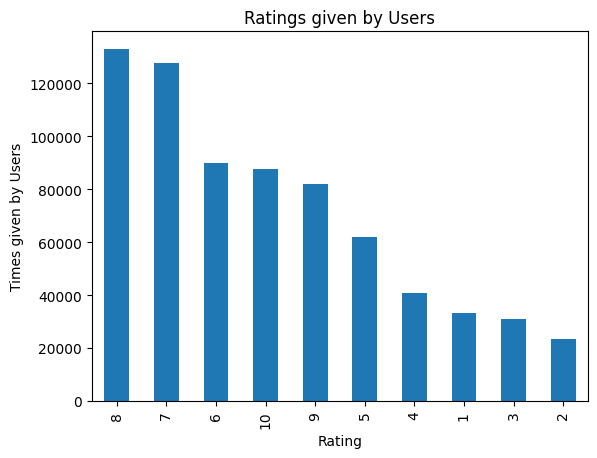

In [58]:
# count the number of occurrences of each rating
rating_counts = df_selected_users['Rating'].value_counts()

# plot a histogram
rating_counts.plot(kind='bar')
# set plot title and axis labels
plt.title('Ratings given by Users')
plt.xlabel('Rating')
plt.ylabel('Times given by Users')

# display the plot
plt.show()

In [59]:
# count the number of occurrences of each User
user_counts = df_selected_users['User_ID'].value_counts()
len(user_counts)

2918

/tmp/ipykernel_3763710/3900238028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_users['Month'] = df_selected_users['Date'].str.split().str[1]


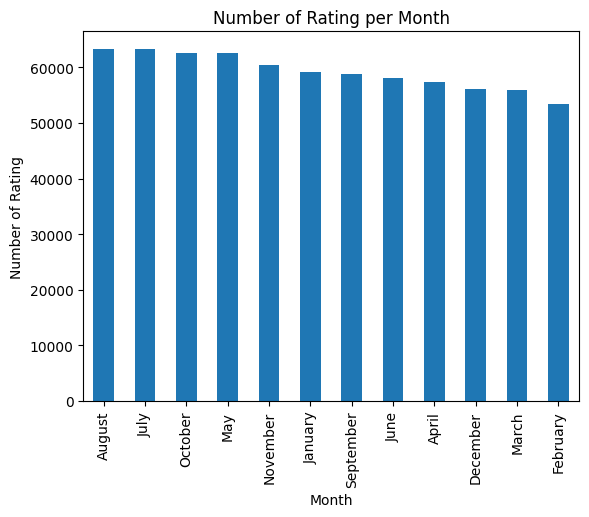

In [60]:
# Adding new column month
df_selected_users['Month'] = df_selected_users['Date'].str.split().str[1]
# print(df_selected_users)

month_counts = df_selected_users['Month'].value_counts()

# plot a histogram
month_counts.plot(kind='bar')
# set plot title and axis labels
plt.title('Number of Rating per Month')
plt.ylabel('Number of Rating')
plt.xlabel('Month')

# display the plot
plt.show()

In [ ]:
# Ενναλακτικη Αναπαρασταση Δεδομένων

# drop duplicates
df_grouped = df_selected_users.groupby(['User_ID', 'Movie_ID']).agg({'Rating': 'mean'}).reset_index()
print(df_grouped)

In [44]:
# pivot the table
df_pivot = df_grouped.pivot(index='User_ID', columns='Movie_ID', values='Rating')
df_pivot

Movie_ID,tt0000001,tt0000003,tt0000005,tt0000007,tt0000008,tt0000010,tt0000012,tt0000013,tt0000014,tt0000015,...,tt9913022,tt9913036,tt9913038,tt9913040,tt9913050,tt9914414,tt9914598,tt9915686,tt9916190,tt9916204
User_ID,,,,,,,,,,,,,,,,,,,,,
ur0001220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ur0002746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ur0003136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ur0003696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ur0004646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ur99519886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ur9972457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ur99782462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# drop movies that are not rated by 50 users at least

counts = df_pivot.count()
# set a threshold value 
threshold = 100
# filter the columns based on the threshold value
filtered_df = df_pivot.loc[:, counts >= threshold]
# print the filtered DataFrame
print(filtered_df.shape)

(2805, 680)


In [46]:
df_pivot = filtered_df

In [47]:
# How many nan values i have
num_nan = np.count_nonzero(np.isnan(df_pivot))
print(num_nan)

# How many non nan values i have
num_non_nan = np.count_nonzero(~np.isnan(df_pivot))
print(num_non_nan)


1804364
103036


In [48]:
# drop columns where all values are NaN
df_pivot = df_pivot.dropna(axis=1, how='all')

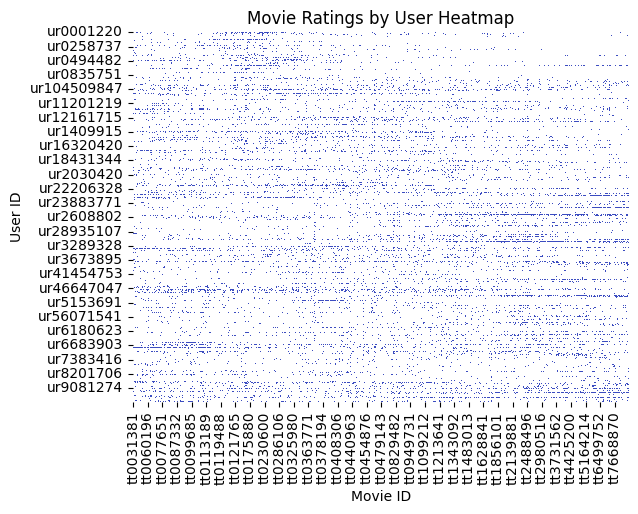

In [49]:
sns.heatmap(df_pivot, cmap='coolwarm', cbar=False)
# set plot title and axis labels
plt.title('Movie Ratings by User Heatmap')
plt.ylabel('User ID')
plt.xlabel('Movie ID')

# show the plot
plt.show()